In [4]:
! pip install netCDF4

     |████████████████████████████████| 4.7MB 4.2MB/s 
     |████████████████████████████████| 296kB 49.5MB/s 


In [25]:
# Load packages
import os, warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4
warnings.simplefilter("ignore")

**Download files**

In [9]:
#Download all (2) dataset

#data1=Monthly Mean: self-calibrated	
data1 = xr.open_dataset("https://psl.noaa.gov/thredds/dodsC/Datasets/dai_pdsi/pdsi.mon.mean.selfcalibrated.nc")

#data2=Monthly Mean
data2 = xr.open_dataset("https://psl.noaa.gov/thredds/dodsC/Datasets/dai_pdsi/pdsi.mon.mean.nc")

**Dataset1**

In [11]:
#Summary for the first dataset
#dataset in .nc format, here we have only one variable pdsi = f(time, lon, lat) in 3 dimensions
data1

<xarray.Dataset>
Dimensions:  (lat: 55, lon: 144, time: 1980)
Coordinates:
  * lon      (lon) float32 -178.75 -176.25 -173.75 ... 173.75 176.25 178.75
  * lat      (lat) float32 -58.75 -56.25 -53.75 -51.25 ... 71.25 73.75 76.25
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2014-12-01
Data variables:
    pdsi     (time, lat, lon) float32 ...
Attributes:
    title:                           Global Monthly Dai Palmer Drought Severi...
    history:                         created Apr 2013 from data at NCAR webpa...
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    original_source:                 NCAR/UCAR: A Dai http://www.cgd.ucar.edu...
    comments:                        original creation date: Thu Oct 25 15:25...
    Conventions:                     COARDS
    details:                         see ncar for more detials and updates
    description:                     \nMonthly Self-calibrated Palmer Drought...
    dataset_title:                   Palmer Drought Severity Index
    DODS_EXTRA.Unlimited_Dimension:  time

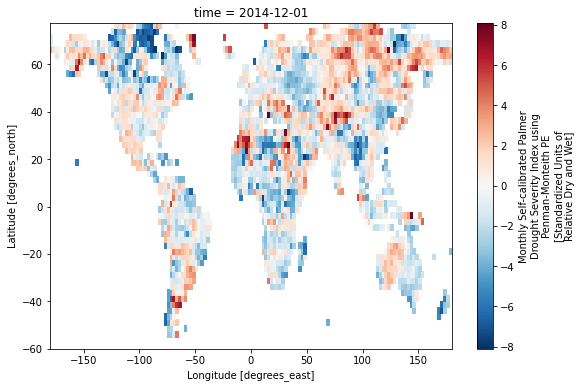

In [19]:
#E.g plotting pdsi for 12/2014
data1.pdsi.sel(time="2014-12-01").plot(size=6)

**Export to drive or locally**

In [42]:
#Extract .nc file in dataframe for analysis
all_dataframe = data1.to_dataframe().reset_index()
all_dataframe.dropna(inplace=True)
print("\nPalmer Drought Severity Index (first data)")
print(all_dataframe)
#all_dataframe.to_csv(os.path.join('all_dataframe.csv'))


Palmer Drought Severity Index (first data)
            lat     lon       time      pdsi
653856   -53.75  -73.75 1888-01-01  1.131634
653857   -53.75  -73.75 1888-02-01  1.208757
653858   -53.75  -73.75 1888-03-01  1.086038
653859   -53.75  -73.75 1888-04-01  1.215373
653860   -53.75  -73.75 1888-05-01  0.114677
...         ...     ...        ...       ...
15655855  76.25  146.25 2014-08-01  1.299209
15655856  76.25  146.25 2014-09-01  2.519789
15655857  76.25  146.25 2014-10-01 -0.578674
15655858  76.25  146.25 2014-11-01 -1.333497
15655859  76.25  146.25 2014-12-01 -1.367655

[3699075 rows x 4 columns]


In [33]:
#Another way
# Extration to external or local machine in .csv file
#Source: https://confluence.ecmwf.int/display/CKB/How+to+convert+NetCDF+to+CSV

from netCDF4 import num2date
f = netCDF4.Dataset("https://psl.noaa.gov/thredds/dodsC/Datasets/dai_pdsi/pdsi.mon.mean.selfcalibrated.nc")
output_dir = './'

# Extract variable
pdsi = f.variables['pdsi']
 
# Get dimensions assuming 3D: time, latitude, longitude
time_dim, lat_dim, lon_dim = pdsi.get_dims()
time_var = f.variables[time_dim.name]
times = num2date(time_var[:], time_var.units)
latitudes = f.variables[lat_dim.name][:]
longitudes = f.variables[lon_dim.name][:]


filename = os.path.join(output_dir, 'PDSI_data.csv')
print(f'Writing data in tabular form to {filename} (this may take some time)...')

times_grid, latitudes_grid, longitudes_grid = [
    x.flatten() for x in np.meshgrid(times, latitudes, longitudes, indexing='ij')]
df = pd.DataFrame({
    'time': [t.isoformat() for t in times_grid],
    'latitude': latitudes_grid,
    'longitude': longitudes_grid,
    'pdsi': pdsi[:].flatten()})
df.to_csv(filename, index=False)
print('Done')

Writing data in tabular form to ./PDSI_data.csv (this may take some time)...
Done
